In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
listings = pd.read_csv('../data/listings.csv')

In [6]:
columns = listings.columns
print(columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [7]:
# Show the listings per neighbourghood, with the most popular neighbourhoods first
# (that is, in decreasing neighbourhood popularity order).
listings_per_neighbourhood = listings['neighbourhood'].value_counts()
print(listings_per_neighbourhood)

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΑΚΡΟΠΟΛΗ                             386
ΘΗΣΕΙΟ                               386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕ

In [8]:
## Neighbourhood Prices in Descending Order

# Create a table with the prices per neighbourhood. The prices information should contain:

# * median price per neighbourhood

# * mean price per neighbourhood

# * standard deviation per neighbourhood

# * number of listings per neighbourhood.

# The contents of the table should be in descending median prices.

listings_grouped_by_neighbourhood = listings.groupby('neighbourhood')
neighbourhood_prices = listings_grouped_by_neighbourhood['price'].agg([np.median, np.mean, np.std, np.size])
neighbourhood_prices = neighbourhood_prices.sort_values(by='median', ascending=False)
print(neighbourhood_prices)

                                  median        mean          std  size
neighbourhood                                                          
ΡΗΓΙΛΛΗΣ                           120.0  367.800000   578.622675     5
ΖΑΠΠΕΙΟ                            114.0  224.068323   641.163173   161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ             104.0  140.650662   229.183015  2416
ΑΚΡΟΠΟΛΗ                           100.0  195.344560   703.321565   386
ΚΟΛΩΝΑΚΙ                           100.0  128.595294   104.431349   425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 90.5  120.284314   104.613533  1122
ΘΗΣΕΙΟ                              90.0  126.492228   124.176775   386
ΚΕΡΑΜΕΙΚΟΣ                          89.0  123.883382   136.367487   343
ΛΥΚΑΒΗΤΤΟΣ                          75.0  104.561728    87.859850   162
ΓΚΑΖΙ                               70.5   95.792453    75.355882   106
ΣΤΑΔΙΟ                              70.0  121.515873   509.991840   252
ΙΛΙΣΙΑ                              70.0   87.189815    53.51901

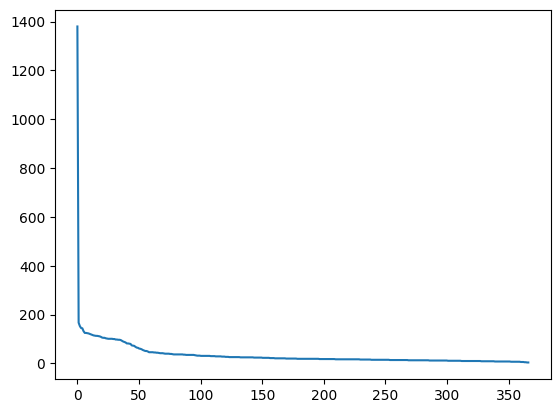

In [17]:
# Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.
x = np.linspace(0,366,366)
y = listings['availability_365'].value_counts()
_ = plt.plot(x,y)